# 数据分析项目 泰坦尼克号之灾

### 分析目标
本次报告基于泰坦尼克号乘客的基本信息和沉船后的生还数据，希望找出泰坦尼克号乘客进行分组后的群体特征，和以及影响乘客生还率的相关因素。

### 数据简介
>泰坦尼克号（英语：RMS Titanic，台湾、港澳、新马等地译作铁达尼号）是一艘奥林匹克级邮轮，于1912年4月首航时撞上冰山后沉没。泰坦尼克号是同级的3艘超级邮轮中的第2艘，与姐妹船奥林匹克号和不列颠号为白星航运公司的乘客们提供大西洋旅行。

>泰坦尼克号由位于北爱尔兰贝尔法斯特的哈兰·沃尔夫船厂兴建，是当时最大的客运轮船，由于其规模相当一艘现代航空母舰，因而号称“上帝也沉没不了的巨型邮轮”。在泰坦尼克号的首航中，从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰昆士敦，计划横渡大西洋前往美国纽约市。但因为人为错误，于1912年4月14日船上时间夜里11点40分撞上冰山；2小时40分钟后，即4月15日凌晨02点20分，船裂成两半后沉入大西洋，死亡人数超越1500人，堪称20世纪最大的海难事件，同时也是最广为人知的海难之一。[1]

[1]: "泰坦尼克号 维基百科." December 25, 2017. Accessed January 10, 2018. https://zh.wikipedia.org/wiki/%E6%B3%B0%E5%9D%A6%E5%B0%BC%E5%85%8B%E5%8F%B7.

原数据来源于[Kaggle的数据集](https://www.kaggle.com/c/titanic/data)，下载于[ShiChJ的GitHub页面](https://github.com/ShiChJ/DAND-Basic-Materials/blob/master/P2/Project_Files/titanic-data.csv)，包含了一个csv文件`titanic-data.csv`，里面有泰坦尼克号上 2224 名乘客和船员中 891 名的人口学数据和乘客基本信息。

### 数据加载


首先需要引入分析过程中需要的几个关键的Python库和功能。

In [1]:
% matplotlib inline
% config InlineBackend.figure_format = 'retina'
import numpy as np
from numpy import array
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns

由于原数据文件的格式为csv，可以通过Pandas的read_csv功能将数据用DataFrame来储存。

为避免数据显示过长，设置显示的最大行数为20行。

In [2]:
pd.options.display.max_rows = 20
df = pd.read_csv('https://raw.githubusercontent.com/ShiChJ/DAND-Basic-Materials/master/P2/Project_Files/titanic-data.csv')

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 观察数据

通过查看数据DataFrame的列名，得到数据包含的基本信息。

In [4]:
for column in df.columns:
    print(column, end = ', ')

PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, 

In [5]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
# 得到乘客的总人数
len(df['PassengerId'])

891

In [7]:
# Survived标签的分类
df.groupby('Survived').groups.keys()

dict_keys([0, 1])

In [8]:
# Pclass标签的分类
df.groupby('Pclass').groups.keys()

dict_keys([1, 2, 3])

In [9]:
# Sex标签的分类
df.groupby('Sex').groups.keys()

dict_keys(['female', 'male'])

In [10]:
# Embarked标签的分类
df.groupby('Embarked').groups.keys()

dict_keys(['C', 'Q', 'S'])

根据观察DataFrame和整理以上信息，得出数据包括的信息如下：

**PassengerId**: 乘客的ID，一共891名乘客，从序号`1`到序号`891`

**Survived**: 乘客在沉船后是否生还，是为`True`，否为`False`

**Pclass**: 乘客来自的船舱等级，`1`为一等舱，`2`为二等舱，`3`为三等舱

**Name**: 乘客的姓名，格式为`'First name, Last name'`

**Sex**: 乘客的性别，男性为`'male'`，女性为`'female'`

**Age**: 乘客的年龄，如果年龄小于1则返回小于一的小数，年龄为估计值则返回格式为xx.5，数据的类型为`float`，若年龄信息未知则返回`NaN`

**SibSp**: 同乘客登船的兄弟姐妹或配偶的数量，数据的类型为`int`

**Parch**: 同乘客登船的父母或孩子的数量，数据的类型为`int`

**Ticket**: 船票号，由于某些船票号有字母前缀，数据类型为`object`

**Fare**: 乘客支付的船票费用，数据的类型为`float`

**Cabin**: 船舱号，未知则返回`NaN`

**Embarked**: 登船港口，`C`代表Cherbourg，`Q`代表Queenstown，`S`代表Southampton

### 描述和绘制原始数据

为统计乘客性别信息，可以用`Series.value_counts()`很方便地得到乘客中的男性数量和女性数量。

In [11]:
sex_series = df['Sex'].value_counts()

In [12]:
sex_series

male      577
female    314
Name: Sex, dtype: int64

以下饼状图展示了乘客的男女比例，可以看出男性乘客有较大的占比，女性乘客只占所有乘客的1/3左右。

(-1.1076137555765015,
 1.1135982299814631,
 -1.1118283194882173,
 1.1005632897363742)

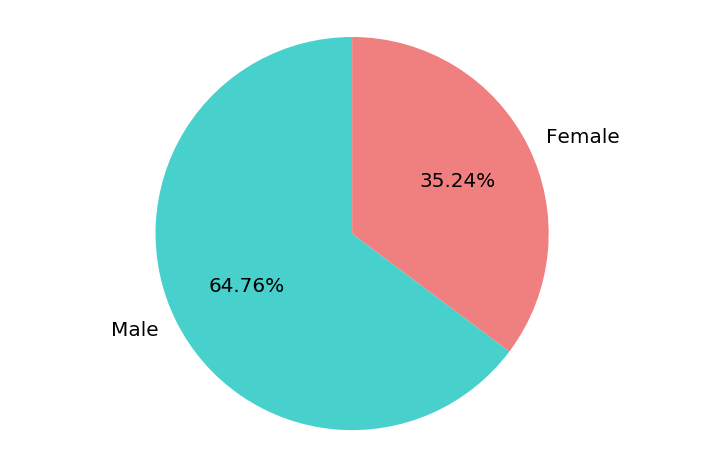

In [13]:
plt.pie([sex_series.iloc[0], sex_series.iloc[1]], labels = ['Male', 'Female'], startangle = 90, autopct = '%.2f%%', 
        colors = ['mediumturquoise', 'lightcoral'])
plt.axis('equal')

乘客年龄统计过程如下，首先可以通过`DataFrame.isnull()`检查有多少乘客的年龄是未知的。

In [14]:
num_unknown_age = sum(df['Age'].isnull())

In [15]:
num_unknown_age

177

然后可以通过`Series.describe()`得到关于乘客年龄在描述统计学方面的信息。

In [16]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

由上可知，有714位乘客的年龄是已知的，平均年龄约为29.7岁，标准偏差约为14.5，中位数年龄是28岁，最小年龄为0.42岁，最大年龄为80岁。

接着统计不同年龄段乘客的数量。忽略年龄未知的乘客，然后将剩下的乘客分为幼年组，少年组，成年组，和老年组，具体定义如下： 

幼年 - 0至12岁以下 - [0, 12)  
少年 - 12至18岁以下 - [12, 18)  
成年 - 18至60岁以下 - [18,60)  
老年 - 60岁及以上 - [60, 100)

In [17]:
num_children = 0
num_adolescents = 0
num_adults = 0
num_aged = 0
p = 0
for age in df['Age']:
    if age < 12:
        num_children += 1
    elif 12 <= age < 18:
        num_adolescents += 1
    elif 18 <= age <60:
        num_adults += 1
    elif age >= 60:
        num_aged += 1
print('Number of children:', num_children)
print('Number of adolescents:', num_adolescents)
print('Number of adults:', num_adults)
print('Number of aged:', num_aged)

Number of children: 68
Number of adolescents: 45
Number of adults: 575
Number of aged: 26


然后通过年龄分组信息，绘制年龄分布的柱状图和饼状图。

Text(0,0.5,'Number of passengers')

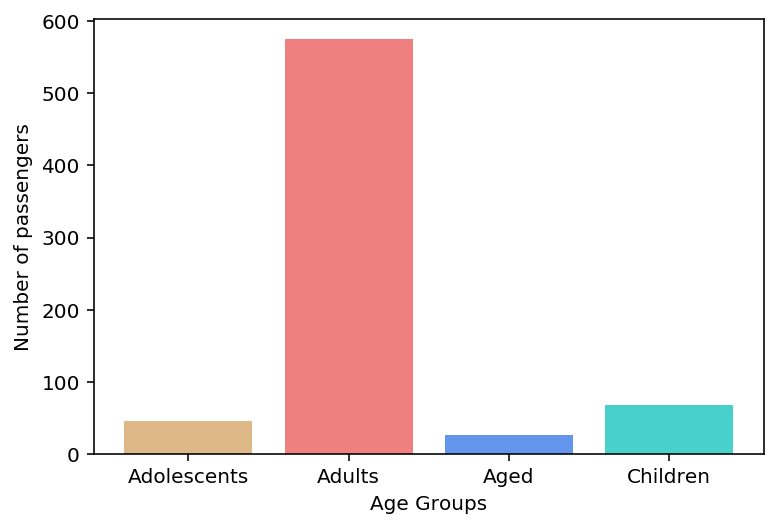

In [18]:
bar_x = ['Children', 'Adolescents', 'Adults', 'Aged']
bar_y = [num_children, num_adolescents, num_adults, num_aged]
plt.bar(bar_x, bar_y, color = ['mediumturquoise', 'burlywood', 'lightcoral', 'cornflowerblue'])
plt.xlabel('Age Groups')
plt.ylabel('Number of passengers')

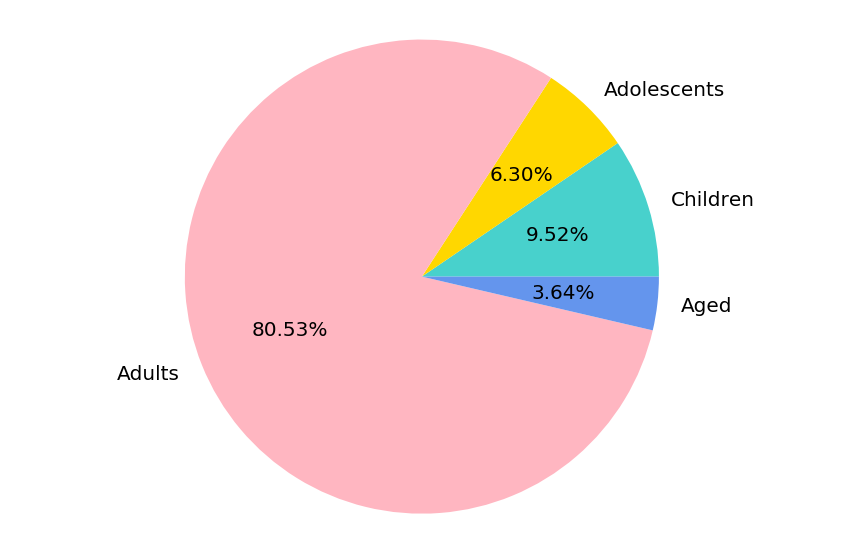

In [19]:
plt.pie(bar_y, labels = bar_x, autopct = '%.2f%%', colors = ['mediumturquoise', 'gold', 'lightpink', 'cornflowerblue'])
plt.axis('equal')
plt.tight_layout()

由上两图可得到的结论是，大部分乘客为成年人，还有大约9.5%的幼年乘客和6.3%的少年乘客，老年乘客的占比比较少，只有3.6%左右。

船舱等级统计过程如下，首先还是检查是否有未知船舱等级的乘客，然后计算不同船舱等级的人数。

In [20]:
sum(df['Pclass'].isnull())

0

In [21]:
pclass_series = df['Pclass'].value_counts()

In [22]:
pclass_series

3    491
1    216
2    184
Name: Pclass, dtype: int64

Text(0,0.5,'Number of Passengers')

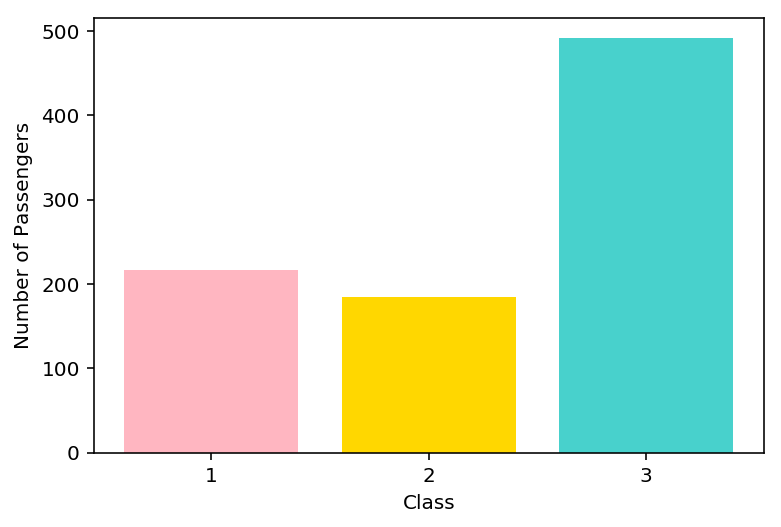

In [23]:
plt.bar(pclass_series.index, pclass_series, color = ['mediumturquoise', 'lightpink', 'gold'])
plt.xticks([1, 2, 3])
plt.xlabel('Class')
plt.ylabel('Number of Passengers')

以上柱状图直观得显示出，三等舱的乘客最多，超过一半的乘客都来自于三等舱，二等舱的乘客最少，不到两百人。

生还率统计过程如下，首先检查有无未知是否生还的乘客。

In [24]:
sum(df['Survived'].isnull())

0

通过以上检查得知所有乘客的生还状况都是已知的，然后计算总生还人数和总遇难人数。

In [25]:
survived_series = df['Survived'].value_counts()

In [26]:
survived_series

0    549
1    342
Name: Survived, dtype: int64

In [27]:
survived_series[1] / (survived_series[0] + survived_series[1]) * 100

38.383838383838381

因此生还人数为342人，遇难人数为549人，生还率约为38.38%。由此绘制饼状图，如下所示。

(-1.1211356815090343,
 1.1137575480815776,
 -1.1105279136747401,
 1.1005013610205496)

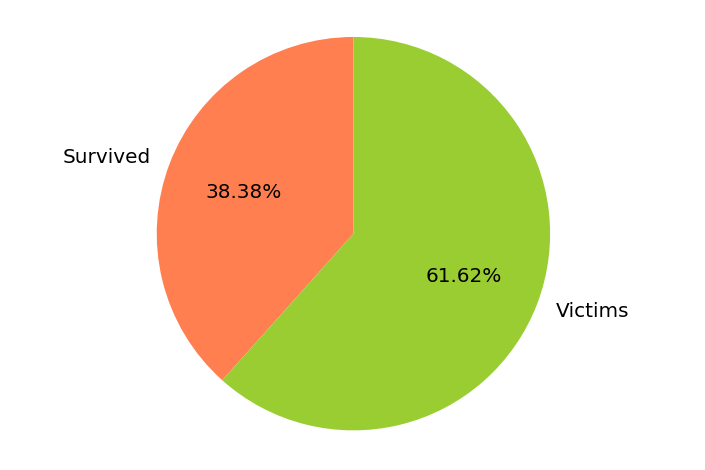

In [28]:
plt.pie([survived_series[1], survived_series[0]], labels = ['Survived', 'Victims'], startangle = 90, 
        autopct = '%.2f%%', colors = ['coral', 'yellowgreen'])
plt.axis('equal')

以下是各个乘客同船的兄弟姐妹或配偶数量的统计，通过`Series.describe()`获得。

In [29]:
df['SibSp'].describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

以上数据说明，各个乘客同船的兄弟姐妹或配偶数量的平均数约为0.52个，标准偏差约为1.10，乘客同船的兄弟姐妹或配偶的最大数量为8个，最小数量为0个。

直方图展示如下，直观地说明了大部分乘客没有携带兄弟姐妹或配偶一同登船。

Text(0,0.5,'Number of Passengers')

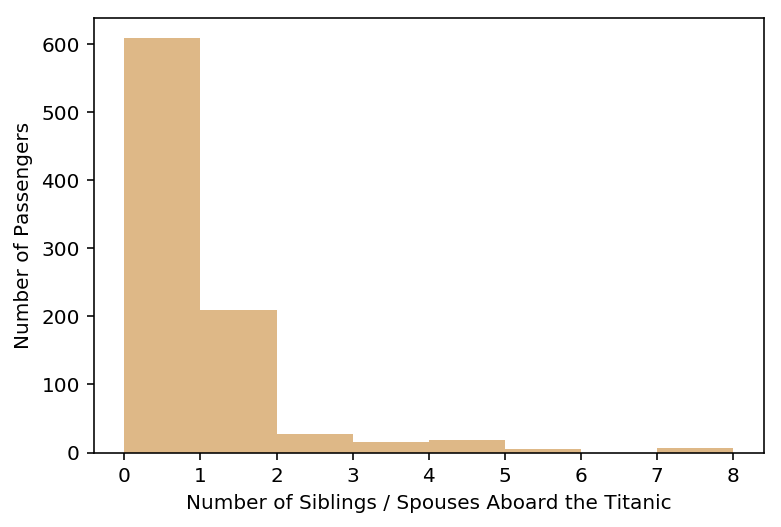

In [30]:
plt.hist(df['SibSp'], bins = 8, color = ['burlywood'])
plt.xlabel('Number of Siblings / Spouses Aboard the Titanic')
plt.ylabel('Number of Passengers')

以下是各个乘客同船的家长或孩子数量的统计，通过`Series.describe()`获得。

In [31]:
df['Parch'].describe()

count    891.000000
mean       0.381594
std        0.806057
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: Parch, dtype: float64

下面数据说明，各个乘客同船的家长或孩子数量的平均数约为0.38个，标准偏差约为0.81，乘客同船的家长或孩子的最大数量为6个，最小数量为0个。

直方图展示如下，直观地说明了大部分乘客没有携带父母或孩子一同登船。

Text(0,0.5,'Number of Passengers')

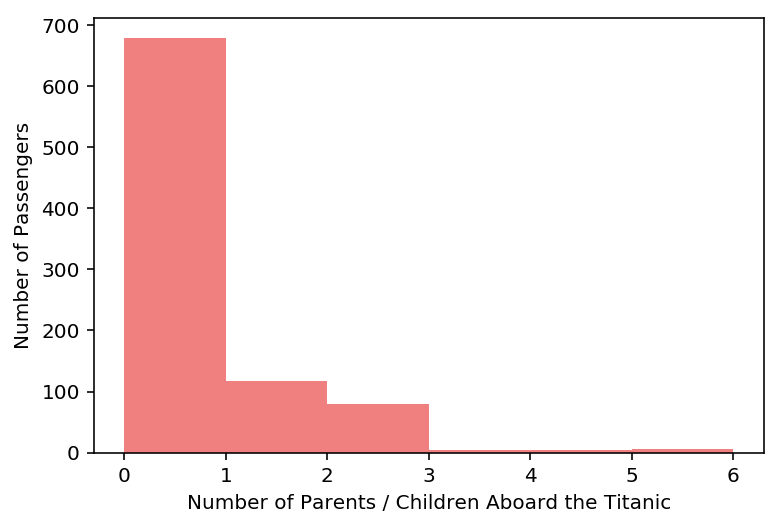

In [32]:
plt.hist(df['Parch'], bins = 6, color = ['lightcoral'])
plt.xlabel('Number of Parents / Children Aboard the Titanic')
plt.ylabel('Number of Passengers')

### 提出问题

通过上面有关原始数据的描述信息，可以初步想到几个值得探究问题：  
- 年龄段与的乘客的生还率存在怎样的关系？
- 性别与乘客的生还率存在怎样的关系？
- 所处的船舱等级与乘客的生还率存在怎样的关系？
- 船上家庭成员的数量与乘客的生还率存在怎样的关系？

### 数据清洗

数据清理过程涉及到处理缺失数值，重复数值，以及异常数值。

在上面描述原始数据的过程中，某些列中的缺失数值已经被留意到，因此在清洗数据时需要决定是否保留或替换那些缺失的数值。在数据清洗的过程中，也将检查是否存在重复数值和异常数值，如果有的话，需要继续探究重复数值和异常数值出现的原因和如何解决这一问题。

首先我们定义一个函数，来计算数据缺失值占总数据的百分比。

In [33]:
total_num = len(df['PassengerId'])
def cal_null_pct(dataframe, column_name):
    null_count = sum(dataframe[column_name].isnull())
    return (null_count / total_num) * 100

然后打印出原数据各项信息的缺失值百分比。

In [34]:
for data in df.columns:
    print('Null Data Percentage for {0}: {1:.2f}%'.format(data, cal_null_pct(df, data)))

Null Data Percentage for PassengerId: 0.00%
Null Data Percentage for Survived: 0.00%
Null Data Percentage for Pclass: 0.00%
Null Data Percentage for Name: 0.00%
Null Data Percentage for Sex: 0.00%
Null Data Percentage for Age: 19.87%
Null Data Percentage for SibSp: 0.00%
Null Data Percentage for Parch: 0.00%
Null Data Percentage for Ticket: 0.00%
Null Data Percentage for Fare: 0.00%
Null Data Percentage for Cabin: 77.10%
Null Data Percentage for Embarked: 0.22%


存在缺失数据的三个部分分别为：乘客的船舱号（77.10%），乘客的年龄（19.87%），以及乘客的登船港口（0.22%）。由于乘客的船舱号数据缺失占比非常大，并不能提供很多有参考度信息，因此在以下关于数据的探究中，乘客的船舱号会被丢弃。 

此次探究不关心的数据部分也会被丢弃，除了上面的乘客船舱号，其它具体还包括了乘客的船票号，乘客支付的船票费用，以及乘客的登船港口，以减少后续人工处理和计算机计算所花费的时间。

In [35]:
del df['Cabin']
del df['Ticket']
del df['Fare']
del df['Embarked']

丢弃掉四组此次探究不关心的数据后，新的`df`如下：

In [36]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0


乘客的年龄是此次研究关心的数据部分，但是需要首先确认如何处理19.87%的数据缺失比这一问题。

由于将缺失值换为任何数值都将影响乘客信息的真实度，最后决定以`NaN`的形式保留缺失值。Pandas在对数据进行数学计算时会自动忽略`NaN`，因此不会造成问题。


处理完缺失数据后，检查是否存在所有信息完全相同的重复数据。

In [37]:
sum(df.duplicated())

0

由于`sum(df.duplicated())`计算出的数字为`0`，说明每一行运行`duplicated()`后的输出结果都是`False`，因此不存在所有信息完全相同的数据。但检查重复数据的工作还没有完成，因为乘客的ID是独一无二的，还应当检查`PassengerId`是否存在重复值。下面输出结果表明也不存在`PassengerId`重复的错误情况。

In [38]:
sum(df['PassengerId'].duplicated())

0

接着检查是否有异常数据的存在，可以通过`DataFrame.describe()`检查到每一列数据。

In [39]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000


PassengerId的数量符合总人数，最小值为1，最大值为891，符合期待情况。Survived的数量符合总人数，最小值为0，最大值为1，符合期待情况。Pclass的数量符合总人数，最小值为1，最大值为3，符合期待情况。Age的缺失值问题在前面已经注意并找到处理方法，最小值为0.42，最大值为80，符合现实情况。SibSp的数量符合总人数，最小值为0，最大值为8，符合现实情况。Parch的数量符合总人数，最小值为0，最大值为6，符合现实情况。

综上所述，此次探究所关心的数据中，还没有发现异常数据的存在。

处理完缺失值、重复数据和异常数据后，还有一项工作可以在数据清洗过程中完成，以方便后续的数据整理。在提出问题的部分可以注意到，关于乘客年龄，此次探究研究的是乘客所处的年龄段是否会影响其生还率，但是乘客年龄的具体数字不是此次探究所关心的。因此，可以在DataFrame里加一组`'AgeGroup'`，列出有年龄数据的乘客所处的年龄组，分别为幼年组，少年组，成年组，和老年组，具体定义和描述原始数据部分相同：

幼年 - 0至12岁以下 - [0, 12)  
少年 - 12至18岁以下 - [12, 18)  
成年 - 18至60岁以下 - [18,60)  
老年 - 60岁及以上 - [60, 100)  

下面用到的方法是`pd.cut()`，可以很方便地对数字形式的数据进行分组。

In [40]:
age_bins = [0, 12, 18, 60, 100]
age_group_category = pd.cut(df['Age'], age_bins, right = False, labels = ['Child', 'Adolescent', 'Adult', 'Aged'])

In [41]:
age_group_category

0           Adult
1           Adult
2           Adult
3           Adult
4           Adult
5             NaN
6           Adult
7           Child
8           Adult
9      Adolescent
          ...    
881         Adult
882         Adult
883         Adult
884         Adult
885         Adult
886         Adult
887         Adult
888           NaN
889         Adult
890         Adult
Name: Age, Length: 891, dtype: category
Categories (4, object): [Child < Adolescent < Adult < Aged]

根据年龄分出每位乘客的年龄组后，可以把结果作为新的一列添加到原数据的DataFrame里面，添加后的`df`如下所示。

In [42]:
df['AgeGroup'] = age_group_category

In [43]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,Adult
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,Adult
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,Child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,Adult
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,Adolescent


同样在提出问题的部分可以留意到，此次探究还会查看船上的家庭成员数量对乘客生还率的影响，而家庭成员数量包括了同乘客登船的兄弟姐妹/配偶的数量以及父母/孩子的数量。因此，可以通过`SibSp`和`Parch`两列数据的相加，得到每位乘客船上家庭成员的数量，并在DataFrame里加一组`'FamilyNum'`数据。

In [44]:
FamilyNum = df['SibSp'] + df['Parch']

In [45]:
df['FamilyNum'] = FamilyNum

最后得到的`df`如下所示。

In [46]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,AgeGroup,FamilyNum
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,Adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,Adult,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,Adult,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,Adult,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,NaN,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,Adult,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,Child,4
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,Adult,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,Adolescent,1


### 数据整理分组与可视化分析

#### 年龄段与生还率的关系

首先对`df`按照年龄段和沉船后是否生还进行分组，以计算每个年龄段生还和遇难的人数。Pandas的`crosstab`可以很方便地从原数据中得出根据两个条件分组后各组的人数。

In [47]:
age_and_survival = pd.crosstab(df['AgeGroup'],df['Survived'])

In [48]:
age_and_survival

Survived,0,1
AgeGroup,,
Child,29,39
Adolescent,23,22
Adult,353,222
Aged,19,7


得到分组数据后，就可以利用条形统计图来展示各个年龄段的生还人数与遇难人数。下面的条形图很直观地显示了生还的幼儿人数大于遇难的幼儿人数，少年组乘客的生还人数和遇难人数相差不大，而成年乘客和老年乘客遇难的人数皆超过了生还人数。

Text(0,0.5,'Number of Passengers')

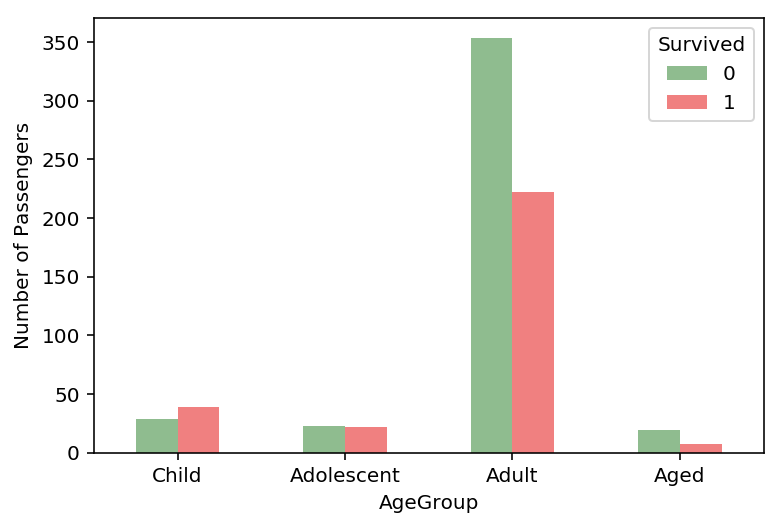

In [49]:
age_and_survival.plot.bar(rot = 0, color = ['darkseagreen', 'lightcoral'])
plt.ylabel('Number of Passengers')

然后可以检查生还和遇难的乘客中各个年龄段的比例是否相似。进行检查前依旧还是先进行分组，但这次将`'Survived'`标签作为index，`'AgeGroup'`标签作为columns。

In [50]:
survival_and_age = pd.crosstab(df['Survived'], df['AgeGroup'])

In [51]:
survival_and_age

AgeGroup,Child,Adolescent,Adult,Aged
Survived,,,,
0,29,23,353,19
1,39,22,222,7


根据以上DataFrame里的数据绘制的堆叠式柱形图如下，可以看出不论是在生还组中还是遇难组中，不同年龄段乘客所占人数的比例都差不多，皆为成年乘客最多，未成年乘客次之，老年乘客最少。

Text(0.5,0,'Number of Passengers')

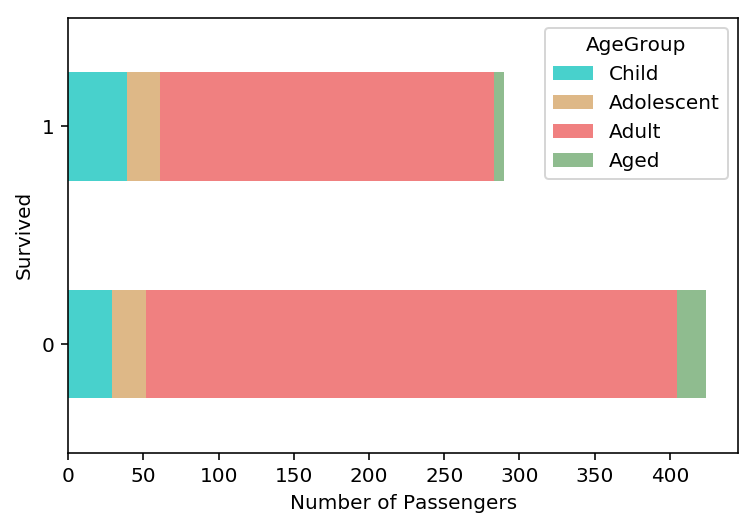

In [52]:
survival_and_age.plot.barh(stacked = True, color = ['mediumturquoise', 'burlywood', 'lightcoral', 'darkseagreen'])
plt.xlabel('Number of Passengers')

接下来计算各个年龄段的生存率。为后续计算节约时间，定义一个计算分组存活率的函数`cal_survival_rate`，以得出幼年组、少年组、成年组与老年组各自的生还率。函数`cal_survival_rate`在后面的部分还可以继续使用。

In [53]:
age_group = df.groupby('AgeGroup')

In [54]:
def cal_survival_rate(group):
    return group.sum() / group.count() * 100

In [55]:
age_group_rate = age_group['Survived'].agg(cal_survival_rate)

In [56]:
age_group_rate

AgeGroup
Child         57.352941
Adolescent    48.888889
Adult         38.608696
Aged          26.923077
Name: Survived, dtype: float64

再定义一个打印生还率的函数，打印结果保留两位小数。

In [57]:
def print_survival_rate(group_rate):
    for i in range(len(group_rate)):
        group_name = group_rate.index.name
        rate = group_rate.iloc[i]
        name = group_rate.index[i]
        print("The survival rate for {0} {1} is: {2:.2f}%".format(group_name, name, rate))

In [58]:
print_survival_rate(age_group_rate)

The survival rate for AgeGroup Child is: 57.35%
The survival rate for AgeGroup Adolescent is: 48.89%
The survival rate for AgeGroup Adult is: 38.61%
The survival rate for AgeGroup Aged is: 26.92%


接着根据计算出的每个年龄组的生还率绘制条形统计图，下面的条形统计图直观地显示出“年龄越小的组生还率越高”这一特征。

Text(0,0.5,'Survival Rate (%)')

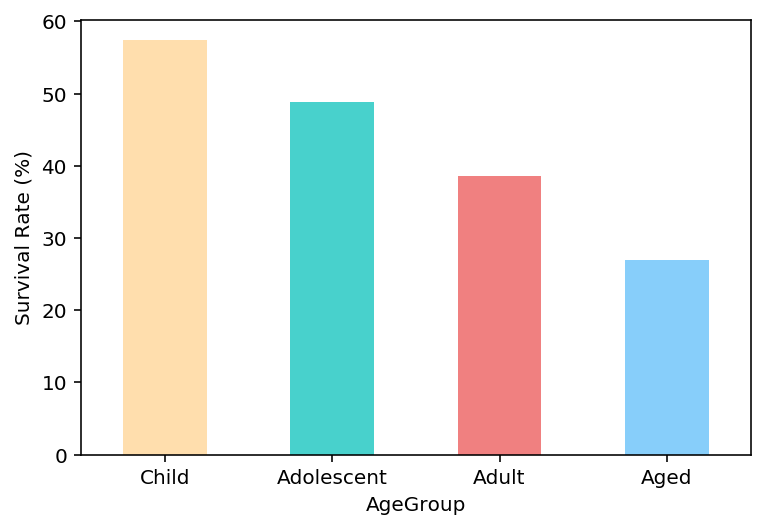

In [59]:
age_group_rate.plot.bar(color = ['navajowhite', 'mediumturquoise', 'lightcoral', 'lightskyblue'], rot = 0)
plt.ylabel('Survival Rate (%)')

#### 性别与生还率的关系

首先根据性别和是否生还这两个条件利用`pd.crosstab`得到分组后的人数，然后基于结果绘制柱状图。

In [60]:
sex_and_survival = pd.crosstab(df['Sex'], df['Survived'])

In [61]:
sex_and_survival

Survived,0,1
Sex,,
female,81,233
male,468,109


从下图的条形统计图可以看出，女性乘客的生还人数大于遇难人数，而男性乘客的遇难人数则远远大于生还人数。

Text(0,0.5,'Number of Passengers')

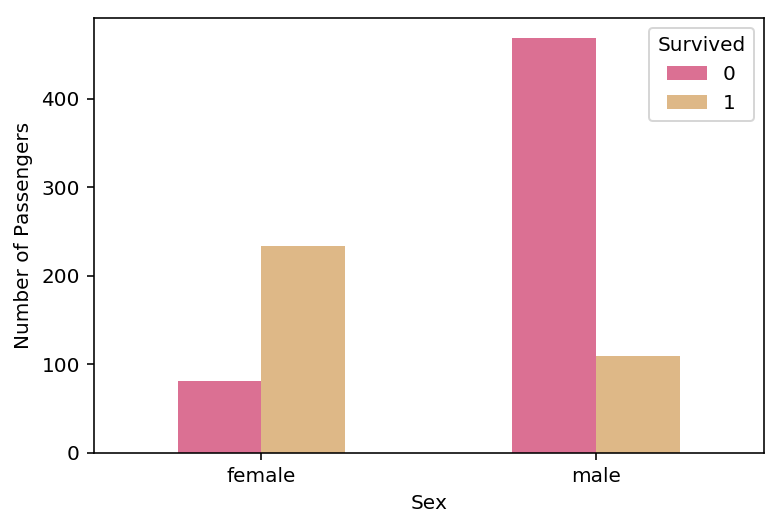

In [62]:
sex_and_survival.plot.bar(color = ['palevioletred', 'burlywood'], rot = 0)
plt.ylabel('Number of Passengers')

接下来通过横向堆积式柱状图查看生还和遇难的乘客中男性和女性的占比。进行检查前依旧先进行分组，将`'Survived'`标签作为index，`'Sex'`标签作为columns。

In [63]:
survival_and_sex = pd.crosstab(df['Survived'], df['Sex'])

In [64]:
survival_and_sex

Sex,female,male
Survived,,
0,81,468
1,233,109


Text(0.5,0,'Number of Passengers')

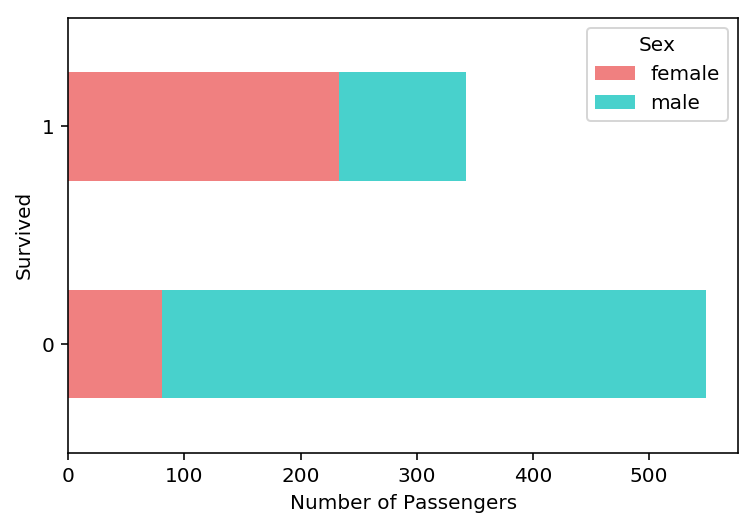

In [65]:
survival_and_sex.plot.barh(stacked = True, color = ['lightcoral', 'mediumturquoise'])
plt.xlabel('Number of Passengers')

上图说明生还乘客和遇难乘客中男女的比例并不一致，在生还组中女性的占比高于男性的占比，而遇难组中男性的占比远远高于女性的占比。

接下来计算男性乘客和女性乘客的生还率。这里可以用到先前定义的函数`cal_survival_rate`，并利用`print_survival_rate`函数打印生还率结果。

In [66]:
sex_group = df.groupby('Sex')

In [67]:
sex_group_rate = sex_group['Survived'].agg(cal_survival_rate)

In [68]:
sex_group_rate

Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

In [69]:
print_survival_rate(sex_group_rate)

The survival rate for Sex female is: 74.20%
The survival rate for Sex male is: 18.89%


然后根据生还率绘制条形图。

Text(0,0.5,'Survival Rate (%)')

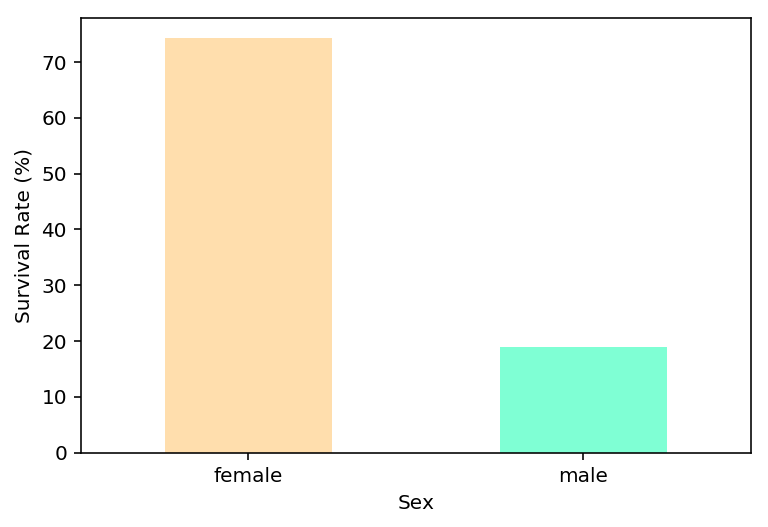

In [70]:
sex_group_rate.plot.bar(color = ['navajowhite', 'aquamarine'], rot = 0)
plt.ylabel("Survival Rate (%)")

通过上图可以看出，女性乘客的生还率达到了百分之七十以上，远远高于男性乘客的生还率。

总结从“年龄段与生还率的关系”和“性别与生还率的关系”这两个部分中得到的结论，未成年组的的生还率高于其它年龄组，女性的生还率高于男性。从中可以看出泰坦尼克号沉船灾难发生时，很有可能采取了“让女人和小孩先走”的救援方案。

#### 船舱等级与生还率的关系

首先根据乘客所处的船舱等级和是否生还这两个条件利用`pd.crosstab`得到分组后的人数，然后基于结果绘制柱状图。

In [71]:
class_and_survival = pd.crosstab(df['Pclass'], df['Survived'])

In [72]:
class_and_survival

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


Text(0,0.5,'Number of Passengers')

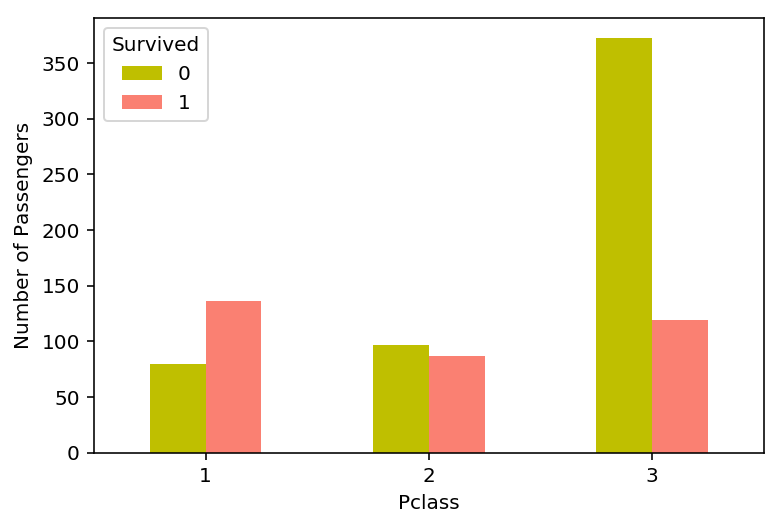

In [73]:
class_and_survival.plot.bar(color = ['y', 'salmon'], rot = 0)
plt.ylabel('Number of Passengers')

从上图可以看出，一等舱乘客中的生还人数高于遇难人数，二等舱乘客中的生还人数略低于遇难人数，而在三等舱乘客中，遇难人数远远高于生还人数。

接着绘制横向堆积式柱状图来查看生还和遇难的总人数中来自不同船舱等级的乘客的占比。进行检查前依旧先进行分组，将`'Survived'`标签作为index，`'Pclass'`标签作为columns。

In [74]:
survival_and_class = pd.crosstab(df['Survived'], df['Pclass'])

In [75]:
survival_and_class

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


Text(0.5,0,'Number of Passengers')

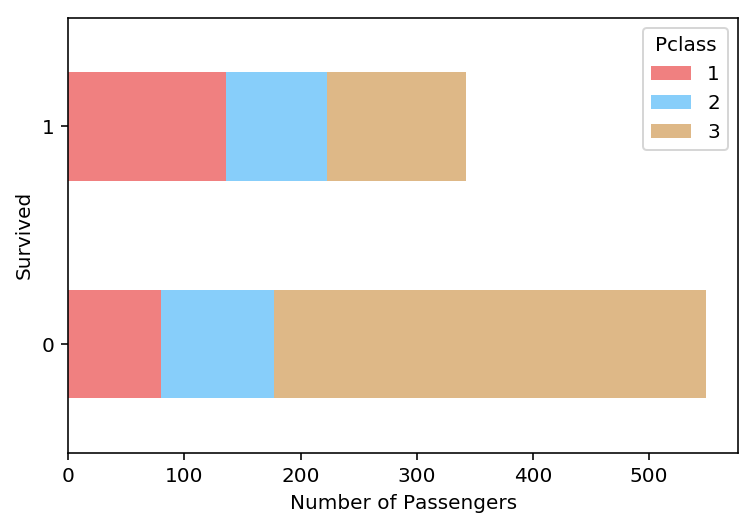

In [76]:
survival_and_class.plot.barh(stacked = True, color = ['lightcoral', 'lightskyblue', 'burlywood'])
plt.xlabel('Number of Passengers')

上图说明了遇难乘客中来自三等舱的是人数最多的，而存活的乘客中来自一等舱的人数是最多的，即使三等舱的乘客人数远远高于一等舱的乘客人数。

接下来计算来自不同船舱等级的乘客的生还率。这里依旧用到了先前定义的函数`cal_survival_rate`，并利用`print_survival_rate`函数打印生还率结果。

In [77]:
class_group = df.groupby('Pclass')

In [78]:
class_group_rate = class_group['Survived'].agg(cal_survival_rate)

In [79]:
class_group_rate

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

In [80]:
print_survival_rate(class_group_rate)

The survival rate for Pclass 1 is: 62.96%
The survival rate for Pclass 2 is: 47.28%
The survival rate for Pclass 3 is: 24.24%


然后根据各个船舱等级乘客的生还率绘制条形统计图。

Text(0,0.5,'Number of Passengers')

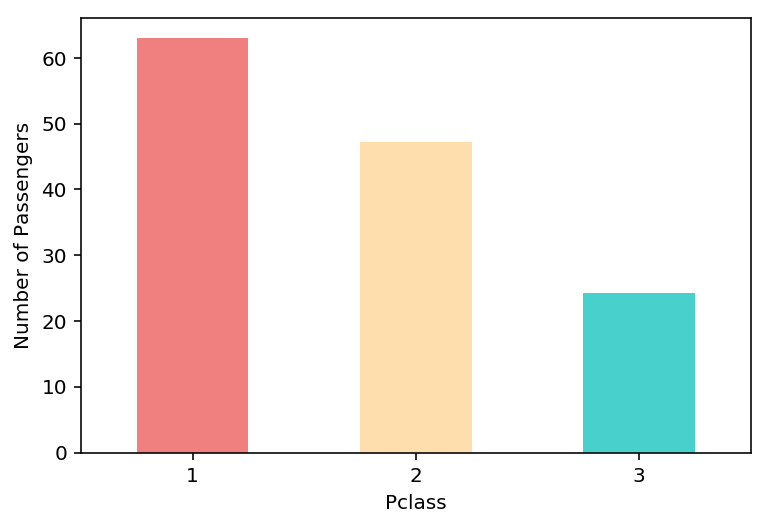

In [81]:
class_group_rate.plot.bar(rot = 0, color = ['lightcoral', 'navajowhite', 'mediumturquoise'])
plt.ylabel('Number of Passengers')

上图直观地说明了船舱等级越低，那一船舱的乘客生还率也就越低，但船舱等级与生还率是否有直接联系无法通过以上分析中判断，因为有可能存在其它潜伏因素影响乘客的生还率。

#### 家庭成员数量与生还率的关系

由于以下部分关注的是船上家庭成员的数量与乘客生还率的关系，同乘客登船的兄弟姐妹或配偶的具体数量或是同乘客登船的父母或孩子的具体数量不在关心的范围内。因此，这一部分用到的是`'FamilyNum'`一列的数据而非'`SibSp`'或`'Parch'`的数据。首先依旧是利用`pd.crosstab`得到根据船上家庭成员数量和是否生还两个条件分组后的乘客人数。

In [82]:
family_and_survival = pd.crosstab(df['FamilyNum'], df['Survived'])

In [83]:
family_and_survival

Survived,0,1
FamilyNum,,
0,374,163
1,72,89
2,43,59
3,8,21
4,12,3
5,19,3
6,8,4
7,6,0
10,7,0


然后根据分组绘制条形统计图。下面的条形图直观地说明了：1. 船上没有家庭成员的乘客中，遇难人数高于生还人数；2. 船上家庭成员数量适中，具体是拥有一至三位同船的家庭成员的乘客中， 幸存人数高于遇难人数；3. 船上家庭成员数量较大，具体是拥有四个以上同船的家庭成员的乘客中，遇难人数普遍高于生还人数。

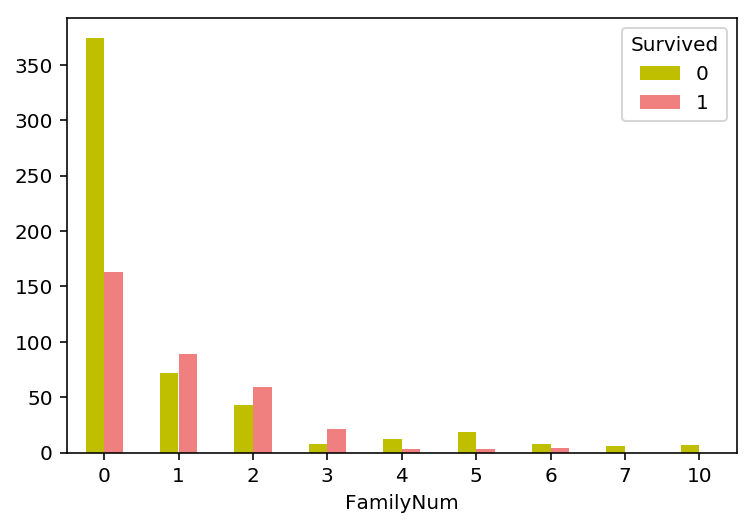

In [84]:
family_and_survival.plot.bar(rot = 0, color = ['y', 'lightcoral'])

然后绘制横向堆积式柱状图来查看生还和遇难的总人数中在船上拥有不同数量家庭成员的乘客的占比。进行检查前依旧先进行分组，将`'Survived'`标签作为index，`'FamilyNum'`标签作为columns。

In [85]:
survival_and_family = pd.crosstab(df['Survived'], df['FamilyNum'])

In [86]:
survival_and_family

FamilyNum,0,1,2,3,4,5,6,7,10
Survived,,,,,,,,,
0,374,72,43,8,12,19,8,6,7
1,163,89,59,21,3,3,4,0,0


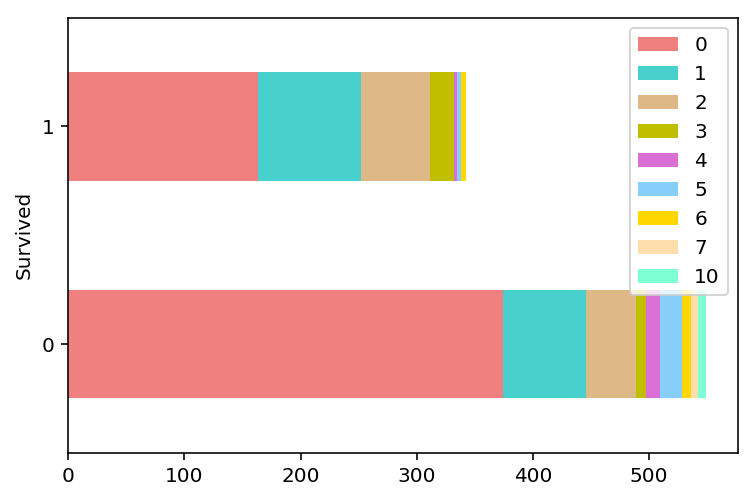

In [87]:
survival_and_family.plot.barh(stacked = True, color = ['lightcoral', 'mediumturquoise', 'burlywood', 'y',
                                                       'orchid', 'lightskyblue', 'gold', 'navajowhite', 
                                                       'aquamarine'])
plt.legend(loc = 'upper right')

从上图可以看出，由于船上无家庭成员乘客的人口基数较大，无论是生还乘客还是遇难乘客中，船上无家庭成员的乘客都是占比最多的。然而对于船上家庭成员数量较多的乘客，在遇难乘客中的占比要高于在生还乘客中的占比。

接下来计算来自不同船舱等级的乘客的生还率。这里依旧用到了先前定义的函数`cal_survival_rate`，并利用`print_survival_rate`函数打印生还率结果。

In [88]:
family_group = df.groupby('FamilyNum')

In [89]:
family_group_rate = family_group['Survived'].agg(cal_survival_rate)

In [90]:
family_group_rate

FamilyNum
0     30.353818
1     55.279503
2     57.843137
3     72.413793
4     20.000000
5     13.636364
6     33.333333
7      0.000000
10     0.000000
Name: Survived, dtype: float64

In [91]:
print_survival_rate(family_group_rate)

The survival rate for FamilyNum 0 is: 30.35%
The survival rate for FamilyNum 1 is: 55.28%
The survival rate for FamilyNum 2 is: 57.84%
The survival rate for FamilyNum 3 is: 72.41%
The survival rate for FamilyNum 4 is: 20.00%
The survival rate for FamilyNum 5 is: 13.64%
The survival rate for FamilyNum 6 is: 33.33%
The survival rate for FamilyNum 7 is: 0.00%
The survival rate for FamilyNum 10 is: 0.00%


然后根据以上数据绘制条形统计图。

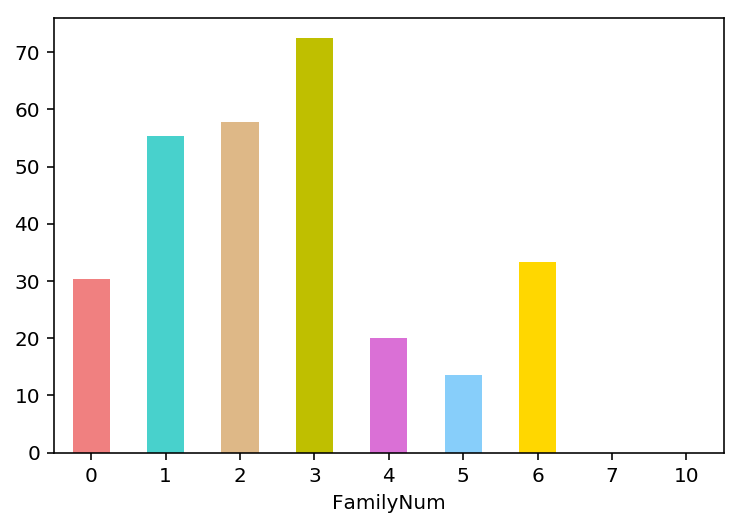

In [92]:
family_group_rate.plot.bar(rot = 0, color = ['lightcoral', 'mediumturquoise', 'burlywood', 'y',
                                             'orchid', 'lightskyblue', 'gold', 'navajowhite', 
                                             'aquamarine'])

上面的条形统计图直观地显示了船上家庭成员数量在一至三位的乘客的生还率要高于拥有其他数量的家庭成员的乘客。特别注意到的是，家庭成员数量在六位以上的乘客的生还率为百分之零，原因可能是拥有较大数量家庭成员的乘客在灾难发生时会急于解救其他家庭成员而非选择逃生，最后也失去了自己逃生的机会。然而以上数据不足以证实这一猜测，且其它因素也可能导致这一结果，比如家庭成员数量在六位以上的乘客都来自于三等舱。

### 分析与总结

此次数据分析探究的样本总数为891个，经过了数据加载，数据清洗，数据整理和数据可视化的过程，并通过以上“年龄段与生还率的关系”，“性别与生还率的关系”，“船舱等级与生还率的关系”和“家庭成员数量与生还率的关系”四个部分的分析，得到了以下结论：
1. 年龄小的乘客生还率更高；
2. 女性乘客的生还率比男性乘客的生还率更高；
3. 来自的船舱等级高的乘客生还率更高；
4. 船上家庭成员数量适中（一位至三位）的乘客生还率更高。


虽然在此次分析过程中得到了非常直观的结论，但是结论也存在一定的局限性，具体如下：
1. 此次研究的样本数量小于泰坦尼克号船上实际的乘客总数，因此结论并不全面适用于泰坦尼克号上所有的乘客；
2. 结论只能显示年龄、性别、船舱等级和船上家庭成员这四个因素与乘客生还率之间的相关性关系，但是否存在因果性关系，以上分析并不能给出明确结论。